<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: MIRI LRS Slit spectroscopy
# Step: photom() in Spec2Pipeline

<span style="color:red"> **Instruments Affected**</span>: MIRI 

### Table of Contents
<div style="text-align: left"> 

<br> [Imports](#imports_ID) <br> [Introduction](#intro_ID) <br> [Get Documentaion String for Markdown Blocks](#markdown_from_docs) <br> [Loading Data](#data_ID) <br> [Run JWST Pipeline](#pipeline_ID) <br> [Create Figure or Print Output](#residual_ID) <br> [About This Notebook](#about_ID) <br>

</div>

<a id="imports_ID"></a>
# Imports
List the library imports and why they are relevant to this notebook.


* os for simple operating system functions
* gwcs.wcstools for bounding box operations
* astropy.io for opening fits files
* inspect to get the docstring of our objects.
* IPython.display for printing markdown output
* jwst.datamodels for building model for JWST Pipeline
* jwst.module.PipelineStep is the pipeline step being tested
* matplotlib.pyplot to generate plot
* matplotlib.patches to plot shapes
* crds for retrieving a reference file


[Top of Page](#title_ID)

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import os
from IPython.display import Markdown
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, collect_pipeline_cfgs
from jwst.background import BackgroundStep
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
from jwst.flatfield import FlatFieldStep
from jwst.photom import PhotomStep
from gwcs.wcstools import grid_from_bounding_box
import crds
from jwst import datamodels

<a id="intro_ID"></a>
# Introduction


For this test we are using the **photom** step for MIRI LRS slit data. For more information on the pipeline step visit the links below. 

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/photom/main.html#imaging-and-non-ifu-spectroscopy

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/photom



### Defining Term
Here is where you will define terms or acronymns that may not be known a general audience (ie a new employee to the institute or an external user). For example

- JWST: James Webb Space Telescope
- MIRI: Mid-Infrared Instrument
- LRS: Low Resolution Spectrometer


[Top of Page](#title_ID)

# Run Pipeline steps up to Photom

The simulated data were generated with MIRISim v2.3.0. The observation consists of an observation of a stellar source in the slit, using the ALONG-SLIT-NOD dither pattern. In this scenario, two exposures are executed with the target at 30 and 70% along the length of the slit. These two observations are subtracted from each other for background subtraction, then co-added in the 3rd stage of the pipeline.

In the first steps we run the Detector1 pipeline, and the Spec2 pipeline steps before **photom**.

**TO DO**: data to be placed into a central location such as artifactory.

In [2]:
if not os.path.exists('../cfg_files/'):
    os.mkdir('../cfg_files/')
    cfgs = collect_pipeline_cfgs.collect_pipeline_cfgs(dst='../cfg_files/')

In [3]:
# SK's file locations:
det1_nod1 = Detector1Pipeline.call('/Users/kendrew/miri/miri_datasims/LRS-slit-simulations/pipeline_testing/mirisimv2.3sim/det_images/det_image_seq1_MIRIMAGE_P750Lexp1.fits', config_file='../cfg_files/calwebb_detector1.cfg', save_results=True)
det1_nod2 = Detector1Pipeline.call('/Users/kendrew/miri/miri_datasims/LRS-slit-simulations/pipeline_testing/mirisimv2.3sim/det_images/det_image_seq2_MIRIMAGE_P750Lexp1.fits', config_file='../cfg_files/calwebb_detector1.cfg', save_results=True)

# KM's file locations:
#Detector1Pipeline.call('mirisimv2.3sim_correctdither/mirisimoutput/det_images/det_image_seq1_MIRIMAGE_P750Lexp1.fits', config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim_correctdither/detector1/')
#Detector1Pipeline.call('mirisimv2.3sim_correctdither/mirisimoutput/det_images/det_image_seq2_MIRIMAGE_P750Lexp1.fits', config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim_correctdither/detector1/')

2020-09-03 09:59:25,799 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-09-03 09:59:25,805 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-09-03 09:59:25,810 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-09-03 09:59:25,819 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-09-03 09:59:25,829 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-09-03 09:59:25,837 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-09-03 09:59:25,845 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

2020-09-03 09:59:26,154 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'det_image_seq1_MIRIMAGE_P750Lexp1.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2020-09-03 09:59:26,163 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_dark_0058.fits'.
2020-09-03 09:59:26,164 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2020-09-03 09:59:26,164 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_linearity_0024.fits'.
2020-09-03 09:59:26,165 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_mask_0023.fits'.
2020-09-03 09:59

2020-09-03 09:59:28,209 - stpipe.Detector1Pipeline.rscd - INFO - Using RSCD reference file /Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_rscd_0010.fits
2020-09-03 09:59:28,312 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd done
2020-09-03 09:59:28,431 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(2, 10, 1024, 1032) from det_image_seq1_MIRIMAGE_P750Lexp1.fits>,).
2020-09-03 09:59:28,432 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kendrew/miri/miri_datasims/LRS-slit-simulations/pipeline_testing/mirisimv2.3sim/det_images', 'dark_output': None}
2020-09-03 09:59:28,447 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK referen

2020-09-03 10:00:00,791 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2020-09-03 10:00:00,792 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2020-09-03 10:00:00,795 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2020-09-03 10:00:01,052 - stpipe.Detector1Pipeline - INFO - Saved model in det_image_seq1_MIRIMAGE_P750Lexp1_rateints.fits
2020-09-03 10:00:01,053 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2020-09-03 10:00:01,162 - stpipe.Detector1Pipeline - INFO - Saved model in det_image_seq1_MIRIMAGE_P750Lexp1_rate.fits
2020-09-03 10:00:01,163 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2020-09-03 10:00:01,450 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-09-03 10:00:01,457 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dq

2020-09-03 10:00:01,780 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'det_image_seq2_MIRIMAGE_P750Lexp1.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2020-09-03 10:00:01,784 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_dark_0058.fits'.
2020-09-03 10:00:01,785 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2020-09-03 10:00:01,785 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_linearity_0024.fits'.
2020-09-03 10:00:01,786 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_mask_0023.fits'.
2020-09-03 10:00

2020-09-03 10:00:03,849 - stpipe.Detector1Pipeline.rscd - INFO - Using RSCD reference file /Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_rscd_0010.fits
2020-09-03 10:00:03,952 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd done
2020-09-03 10:00:04,074 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(2, 10, 1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1.fits>,).
2020-09-03 10:00:04,075 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kendrew/miri/miri_datasims/LRS-slit-simulations/pipeline_testing/mirisimv2.3sim/det_images', 'dark_output': None}
2020-09-03 10:00:04,092 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK referen

2020-09-03 10:00:32,570 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2020-09-03 10:00:32,570 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2020-09-03 10:00:32,574 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2020-09-03 10:00:32,833 - stpipe.Detector1Pipeline - INFO - Saved model in det_image_seq2_MIRIMAGE_P750Lexp1_rateints.fits
2020-09-03 10:00:32,834 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2020-09-03 10:00:32,978 - stpipe.Detector1Pipeline - INFO - Saved model in det_image_seq2_MIRIMAGE_P750Lexp1_rate.fits
2020-09-03 10:00:32,979 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


In [4]:
awcs_nod1 = AssignWcsStep.call(det1_nod1, config_file='../cfg_files/assign_wcs.cfg', save_results=True)
awcs_nod2 = AssignWcsStep.call(det1_nod2, config_file='../cfg_files/assign_wcs.cfg', save_results=True)

2020-08-20 16:11:52,468 - CRDS - ERROR -  Error determining best reference for 'pars-assignwcsstep'  =   Unknown reference type 'pars-assignwcsstep'
2020-08-20 16:11:52,472 - stpipe.assign_wcs - INFO - AssignWcsStep instance created.
2020-08-20 16:11:52,528 - stpipe.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from det_image_seq1_MIRIMAGE_P750Lexp1_rate.fits>,).
2020-08-20 16:11:52,529 - stpipe.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-08-20 16:11:53,097 - stpipe.assign_wcs - INFO - Created a MIRI mir_lrs-fixedslit pipeline with references {'distortion': '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_distortion_0028.asdf', 'filteroffset':

(0.0, 400.0)

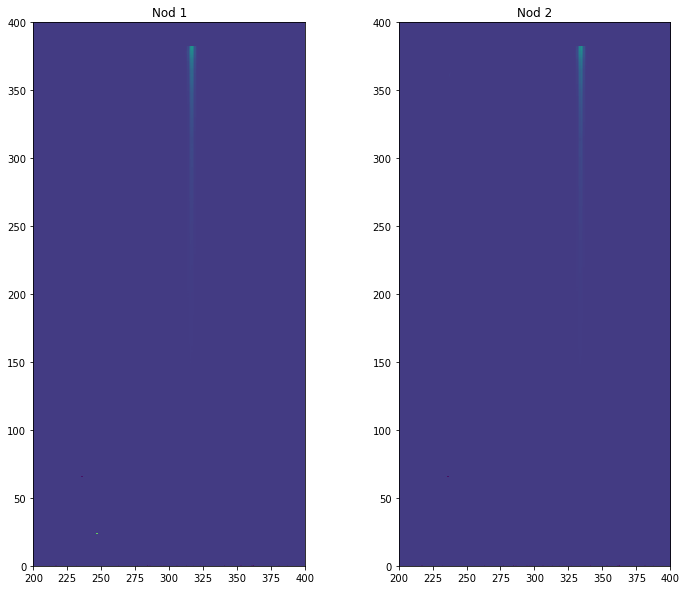

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12,10])
ax[0].imshow(awcs_nod1.data, origin='lower', aspect='equal', interpolation='None')
ax[0].set_title('Nod 1')
ax[0].set_xlim([200,400])
ax[0].set_ylim([0,400])

ax[1].imshow(awcs_nod2.data, origin='lower', aspect='equal', interpolation='None')
ax[1].set_title('Nod 2')
ax[1].set_xlim([200,400])
ax[1].set_ylim([0,400])


In [6]:
bgsub_1 = [awcs_nod2.meta.filename]
bgsub_2 = [awcs_nod1.meta.filename]

In [7]:
bgr_nod1 = BackgroundStep.call(awcs_nod1, bgsub_1, save_results='True')
bgr_nod2 = BackgroundStep.call(awcs_nod2, bgsub_2, save_results='True')

2020-08-20 16:12:55,471 - CRDS - ERROR -  Error determining best reference for 'pars-backgroundstep'  =   Unknown reference type 'pars-backgroundstep'
2020-08-20 16:12:55,472 - stpipe.BackgroundStep - INFO - BackgroundStep instance created.
2020-08-20 16:12:55,534 - stpipe.BackgroundStep - INFO - Step BackgroundStep running with args (<ImageModel(1024, 1032) from det_image_seq1_MIRIMAGE_P750Lexp1_assign_wcs.fits>, ['det_image_seq2_MIRIMAGE_P750Lexp1_assign_wcs.fits']).
2020-08-20 16:12:55,535 - stpipe.BackgroundStep - INFO - Step BackgroundStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sigma': 3.0, 'maxiters': None}
2020-08-20 16:12:56,082 - stpipe.BackgroundStep - WARNING - /Users/kendrew/anaconda3/envs/jwst0.16.2/lib/python3.8/site-packages/gwcs/wcs.py:131: Visi

In [8]:
e2d_nod1 = Extract2dStep.call(bgr_nod1, config_file='../cfg_files/extract_2d.cfg', save_results='True')
e2d_nod2 = Extract2dStep.call(bgr_nod2, config_file='../cfg_files/extract_2d.cfg', save_results='True')

2020-08-20 16:13:13,471 - CRDS - ERROR -  Error determining best reference for 'pars-extract2dstep'  =   Unknown reference type 'pars-extract2dstep'
2020-08-20 16:13:13,475 - stpipe.extract_2d - INFO - Extract2dStep instance created.
2020-08-20 16:13:13,543 - stpipe.extract_2d - INFO - Step extract_2d running with args (<ImageModel(1024, 1032) from det_image_seq1_MIRIMAGE_P750Lexp1_backgroundstep.fits>,).
2020-08-20 16:13:13,545 - stpipe.extract_2d - INFO - Step extract_2d parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_name': None, 'apply_wavecorr': True, 'extract_orders': None, 'extract_height': None, 'grism_objects': None, 'mmag_extract': 99.0}
2020-08-20 16:13:13,558 - stpipe.extract_2d - INFO - EXP_TYPE is MIR_LRS-FIXEDSLIT
2020-08-20 16:13:13,559 - stpipe.ext

In [9]:
ff_nod1 = FlatFieldStep.call(e2d_nod1, config_file='../cfg_files/flat_field.cfg', save_results='True')
ff_nod2 = FlatFieldStep.call(e2d_nod2, config_file='../cfg_files/flat_field.cfg', save_results='True')

2020-08-20 16:13:25,530 - CRDS - ERROR -  Error determining best reference for 'pars-flatfieldstep'  =   Unknown reference type 'pars-flatfieldstep'
2020-08-20 16:13:25,533 - stpipe.flat_field - INFO - FlatFieldStep instance created.
2020-08-20 16:13:25,597 - stpipe.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from det_image_seq1_MIRIMAGE_P750Lexp1_extract_2d.fits>,).
2020-08-20 16:13:25,599 - stpipe.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False}
2020-08-20 16:13:25,688 - stpipe.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-20 16:13:25,689 - stpipe.flat_field - WARNING - Keyword CDP_LOW_QUAL d

## Photom step